# Data Analysis of Heart Disease DataSet

### TASK 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
#distribution of target variable(Target)

In [9]:
df['AHD'].value_counts(normalize=True)

AHD
No     0.541254
Yes    0.458746
Name: proportion, dtype: float64

### TASK 2

### Handle Missing Data

In [7]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [27]:
df.isna().sum()

Unnamed: 0       0
Age              0
Sex            303
ChestPain        0
RestBP           0
Chol             0
Fbs              0
RestECG          0
MaxHR            0
ExAng            0
Oldpeak          0
Slope            0
Ca               4
Thal             2
AHD              0
HeartStress      0
dtype: int64

In [28]:
missing_data = df.isnull().sum()
missing = missing_data[missing_data > 0]
print(missing)

Sex     303
Ca        4
Thal      2
dtype: int64


In [29]:
df.dropna()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HeartStress


### Feature Engineering

In [21]:
def heart_data(df):
    df = df.copy()
    df['Ca'] = df['Ca'].fillna(df['Ca'].median())
    df['Thal'] = df['Thal'].fillna('Unknown')
    return df
heart_data(df)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HeartStress
0,1,63,Male,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,6.9
1,2,67,Male,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,3.0
2,3,67,Male,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,5.2
3,4,37,Male,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,10.5
4,5,41,Female,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,Male,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,2.4
299,300,68,Male,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,6.8
300,301,57,Male,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,2.4
301,302,57,Female,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,0.0


In [30]:
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
df[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df[['RestBP', 'Chol', 'MaxHR']])

In [33]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HeartStress
0,1,63,NaN,typical,0.757525,-0.264900,1,2,0.017197,0,2.3,3,0.0,fixed,No,6.9
1,2,67,NaN,asymptomatic,1.611220,0.760415,0,2,-1.821905,1,1.5,2,3.0,normal,Yes,3.0
2,3,67,NaN,asymptomatic,-0.665300,-0.342283,0,2,-0.902354,1,2.6,2,2.0,reversable,Yes,5.2
3,4,37,NaN,nonanginal,-0.096170,0.063974,0,0,1.637359,0,3.5,3,0.0,normal,No,10.5
4,5,41,NaN,nontypical,-0.096170,-0.825922,0,2,0.980537,0,1.4,1,0.0,normal,No,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,NaN,typical,-1.234430,0.334813,0,0,-0.770990,0,1.2,2,0.0,reversable,Yes,2.4
299,300,68,NaN,asymptomatic,0.700612,-1.038723,1,0,-0.376896,0,3.4,2,2.0,reversable,Yes,6.8
300,301,57,NaN,asymptomatic,-0.096170,-2.238149,0,0,-1.515388,1,1.2,2,1.0,reversable,Yes,2.4
301,302,57,NaN,nontypical,-0.096170,-0.206864,0,2,1.068113,0,0.0,2,1.0,normal,Yes,0.0


### Create New Features

In [14]:
df['HeartStress'] = df['Oldpeak'] * df['Slope']

In [26]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HeartStress
0,1,63,NaN,typical,0.757525,-0.264900,1,2,0.017197,0,2.3,3,0.0,fixed,No,6.9
1,2,67,NaN,asymptomatic,1.611220,0.760415,0,2,-1.821905,1,1.5,2,3.0,normal,Yes,3.0
2,3,67,NaN,asymptomatic,-0.665300,-0.342283,0,2,-0.902354,1,2.6,2,2.0,reversable,Yes,5.2
3,4,37,NaN,nonanginal,-0.096170,0.063974,0,0,1.637359,0,3.5,3,0.0,normal,No,10.5
4,5,41,NaN,nontypical,-0.096170,-0.825922,0,2,0.980537,0,1.4,1,0.0,normal,No,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,NaN,typical,-1.234430,0.334813,0,0,-0.770990,0,1.2,2,0.0,reversable,Yes,2.4
299,300,68,NaN,asymptomatic,0.700612,-1.038723,1,0,-0.376896,0,3.4,2,2.0,reversable,Yes,6.8
300,301,57,NaN,asymptomatic,-0.096170,-2.238149,0,0,-1.515388,1,1.2,2,1.0,reversable,Yes,2.4
301,302,57,NaN,nontypical,-0.096170,-0.206864,0,2,1.068113,0,0.0,2,1.0,normal,Yes,0.0


# TASK 3

### Univariate Analysis

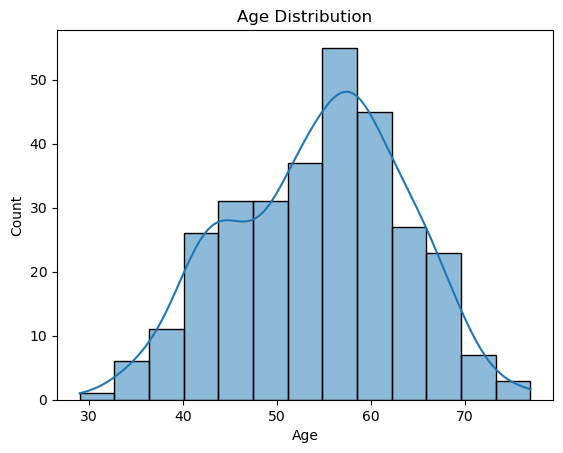

In [18]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

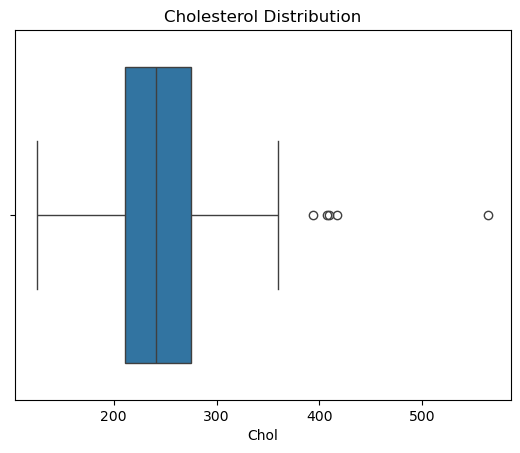

In [19]:
sns.boxplot(x=df['Chol'])
plt.title('Cholesterol Distribution')
plt.show()

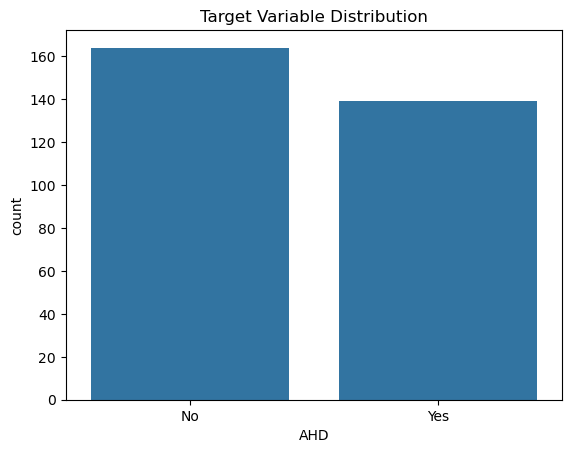

In [20]:
#Visualize
sns.countplot(x=df['AHD'])
plt.title('Target Variable Distribution')
plt.show()

### Bivariate Analysis

### Count plot or bar plot

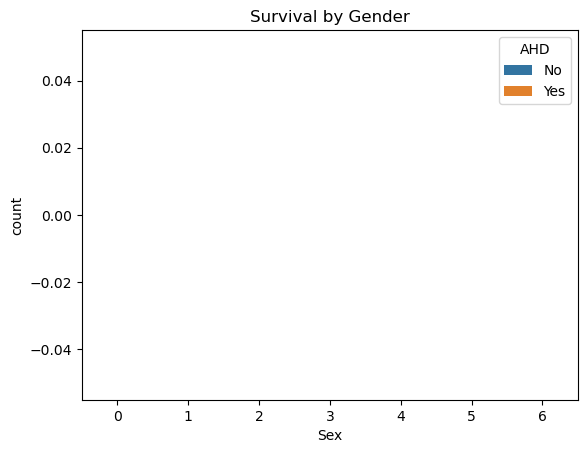

In [36]:
#count plot or bar plot for categorical features like Sex, ChestPainType, FBS, ExerciseAngina.
 
sns.countplot(x='Sex', hue='AHD', data=df)
plt.title('Survival by Gender')
plt.show()

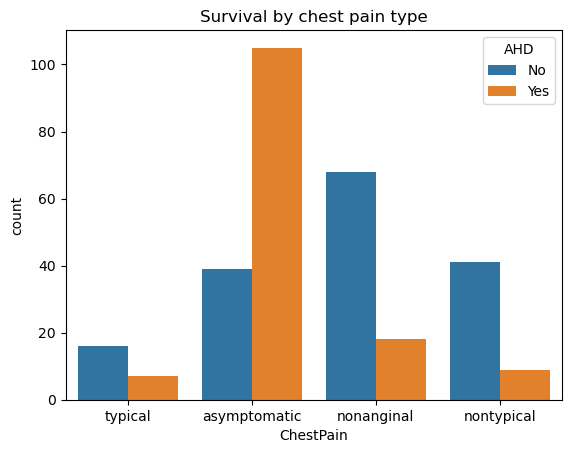

In [50]:
#count plot or bar plot for categorical features like Sex, ChestPainType, FBS, ExerciseAngina.
 
sns.countplot(x='ChestPain', hue='AHD', data=df)
plt.title('Survival by chest pain type')
plt.show()

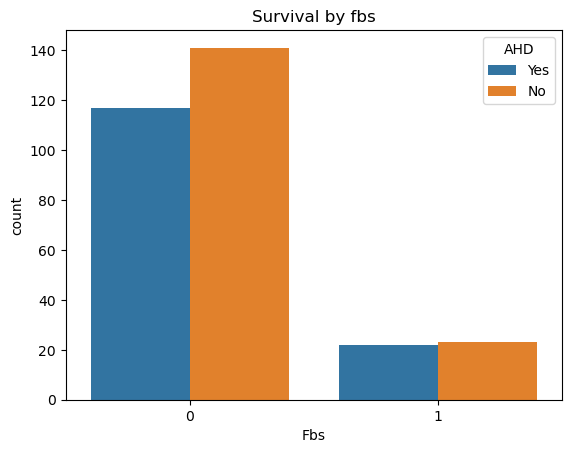

In [53]:
#count plot or bar plot for categorical features like Sex, ChestPainType, FBS, ExerciseAngina.
 
sns.countplot(x='Fbs', hue='AHD', data=df)
plt.title('Survival by fbs')
plt.show()

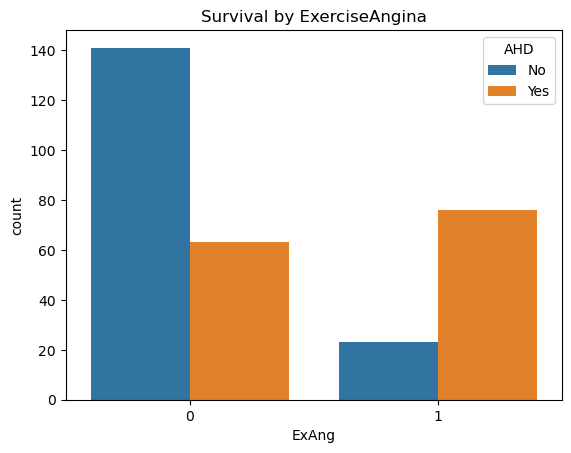

In [54]:
#count plot or bar plot for categorical features like Sex, ChestPainType, FBS, ExerciseAngina.
 
sns.countplot(x='ExAng', hue='AHD', data=df)
plt.title('Survival by ExerciseAngina')
plt.show()

### Box plot

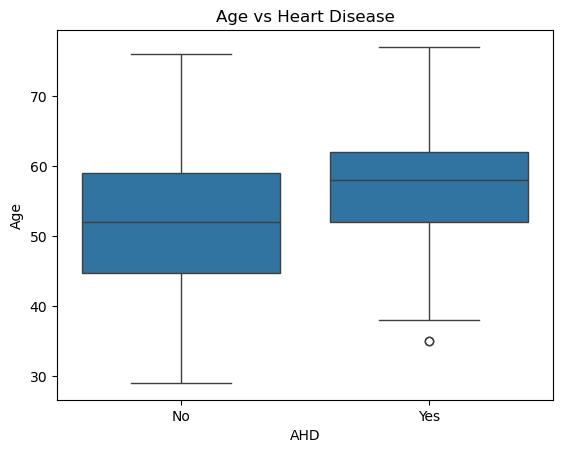

In [37]:
sns.boxplot(x='AHD', y='Age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

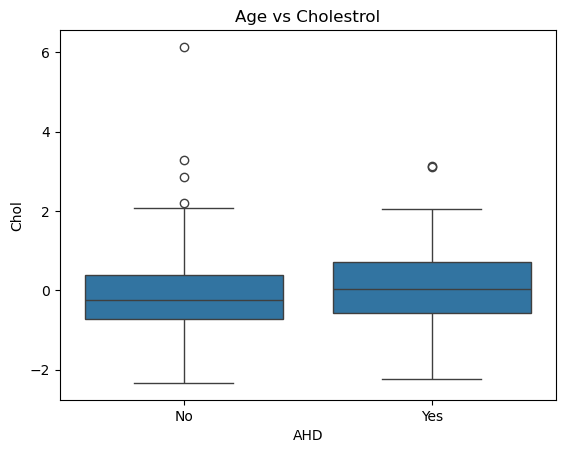

In [58]:
sns.boxplot(x='AHD', y='Chol', data=df)
plt.title('Age vs Cholestrol')
plt.show()

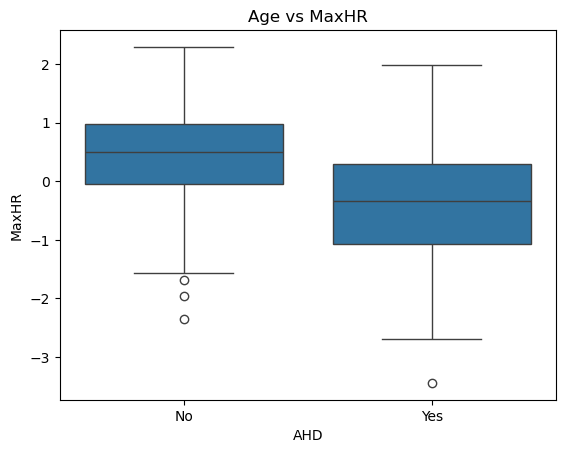

In [57]:
sns.boxplot(x='AHD', y='MaxHR', data=df)
plt.title('Age vs MaxHR')
plt.show()

### Violin Plot

In [38]:
numerical_features = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

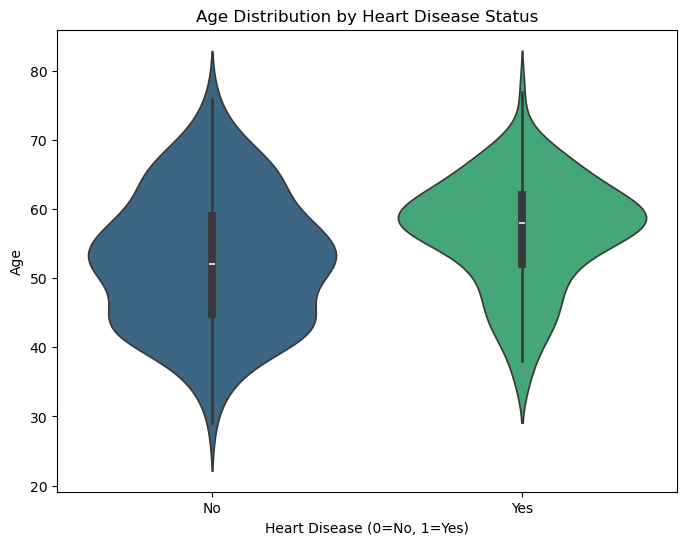

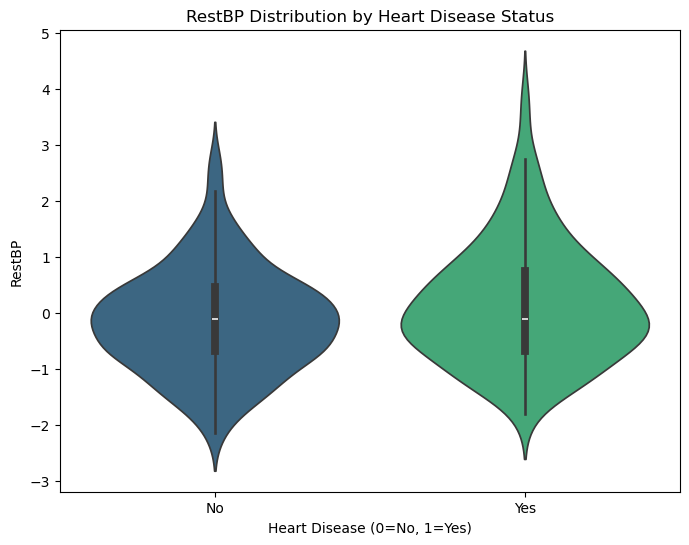

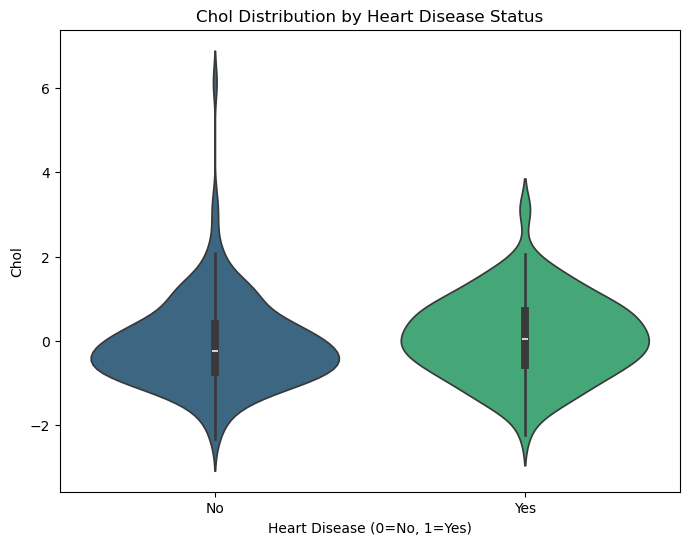

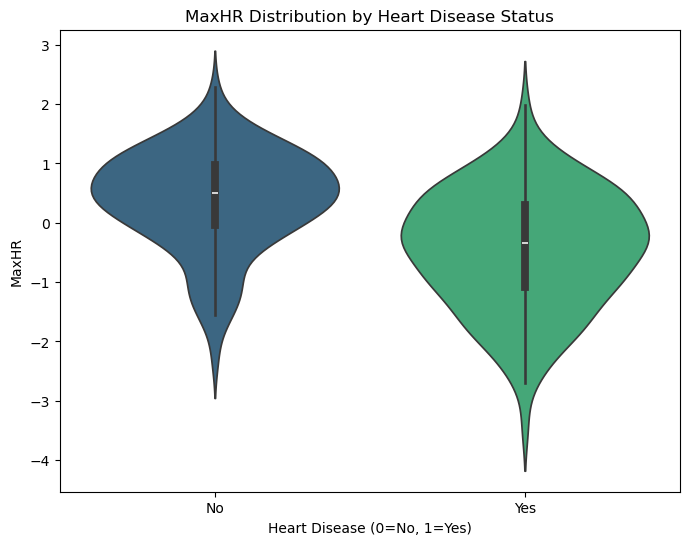

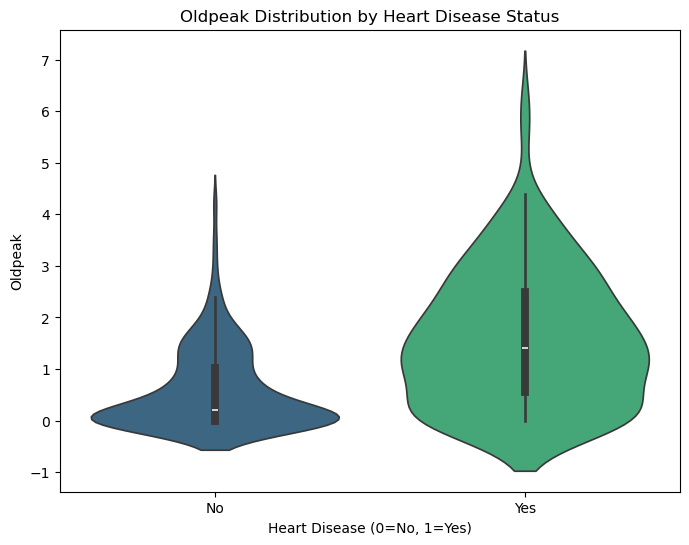

In [39]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='AHD', y=feature, data=df, hue='AHD', palette='viridis')
    plt.title(f'{feature} Distribution by Heart Disease Status')
    plt.xlabel('Heart Disease (0=No, 1=Yes)')
    plt.ylabel(feature)
    plt.show()

### Correlation Matrix

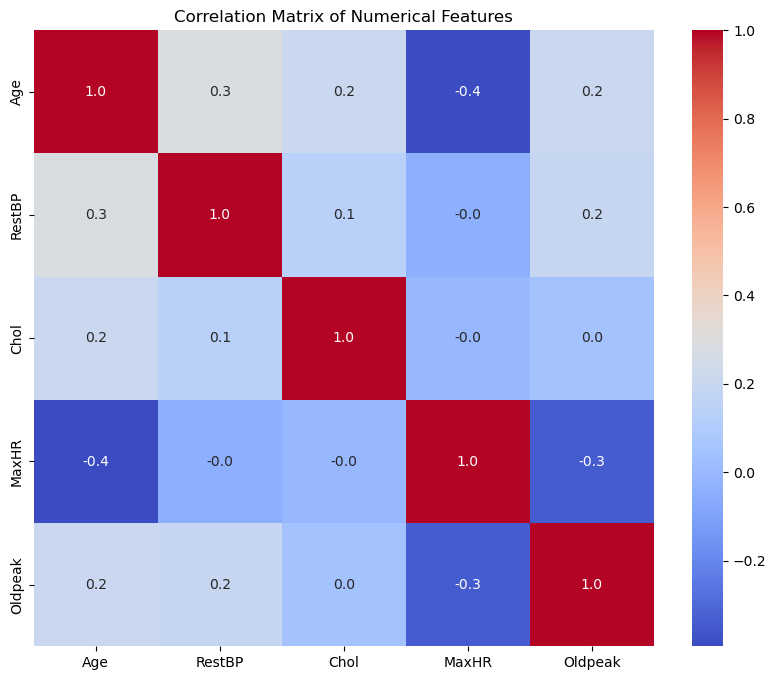

In [44]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Visualizing Correlations

In [41]:
selected_features = ['Chol', 'Age', 'RestBP']

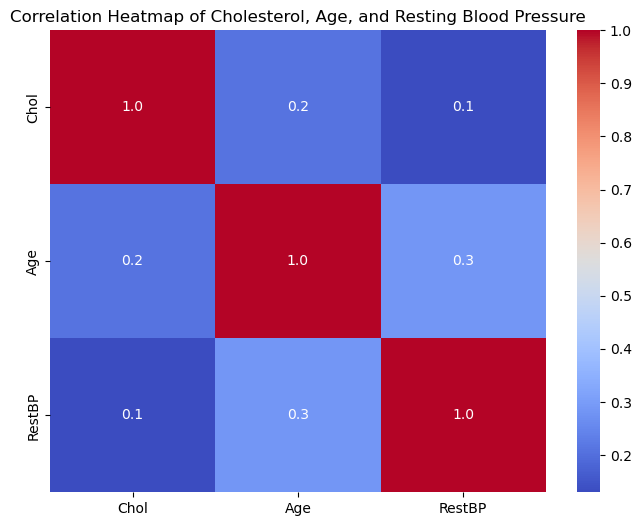

In [43]:
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap of Cholesterol, Age, and Resting Blood Pressure')
plt.show()

# TASK 4

### Aggregation and Insigths

### Distribution of Heart Disease by Gender

In [47]:
disease_bygender= df.groupby('Sex')['AHD'].value_counts()
print("\nDistribution of Heart Disease by Gender:")
print(disease_bygender)


Distribution of Heart Disease by Gender:
Series([], Name: count, dtype: int64)


### Distribution of Heart Disease by Chest Pain Type

In [46]:
disease_by_chest_pain = df.groupby('ChestPain')['AHD'].value_counts()
print("\nDistribution of Heart Disease by Chest Pain Type:")
print(disease_by_chest_pain)


Distribution of Heart Disease by Chest Pain Type:
ChestPain     AHD
asymptomatic  Yes    105
              No      39
nonanginal    No      68
              Yes     18
nontypical    No      41
              Yes      9
typical       No      16
              Yes      7
Name: count, dtype: int64


### Max heartrate acheived

In [59]:
disease_by_maxhr_category = df.groupby('MaxHR')['AHD'].value_counts()
print("\nDistribution of Heart Disease by Maximum Heart Rate Category:")
print(disease_by_maxhr_category)


Distribution of Heart Disease by Maximum Heart Rate Category:
MaxHR      AHD
-3.442067  Yes    1
-2.697668  Yes    1
-2.610092  Yes    1
-2.391151  Yes    1
-2.347363  No     1
                 ..
 1.768724  No     1
 1.856300  No     1
 1.943876  No     1
 1.987664  Yes    1
 2.294182  No     1
Name: count, Length: 138, dtype: int64


### Average cholestrate levels

In [60]:
average_cholesterol = df.groupby(['AHD', 'ChestPain'])['Chol'].mean().unstack()

In [61]:
print("Average Cholesterol Levels by Heart Disease Status (Original) and Chest Pain Type:")
print(average_cholesterol)

Average Cholesterol Levels by Heart Disease Status (Original) and Chest Pain Type:
ChestPain  asymptomatic  nonanginal  nontypical   typical
AHD                                                      
No            -0.026305   -0.027348   -0.116270 -0.325355
Yes            0.111141   -0.148827    0.324065  0.135829


# TASK 5

### Derive medical Insights

### Age and Heart Disease Prevalence 

### Insight 1

In [62]:
print("\nInsight 1: Older individuals tend to have a higher prevalence of heart disease.")
bins_age = [20, 30, 40, 50, 60, 70, 80]
labels_age = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)
age_heart_disease = df.groupby('AgeGroup', observed=True)['AHD'].apply(lambda x: (x == 'Yes').mean() * 100)


Insight 1: Older individuals tend to have a higher prevalence of heart disease.


In [63]:
print("Heart Disease Prevalence by Age Group (%):\n", age_heart_disease)

Heart Disease Prevalence by Age Group (%):
 AgeGroup
20-29     0.000000
30-39    28.571429
40-49    30.555556
50-59    48.000000
60-69    60.493827
70-79    40.000000
Name: AHD, dtype: float64


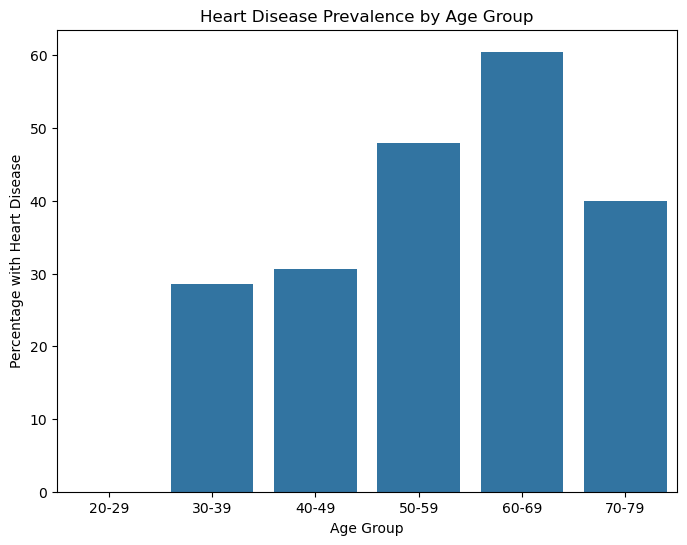

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x=age_heart_disease.index, y=age_heart_disease.values)
plt.title('Heart Disease Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Heart Disease')
plt.show()

### Insight 2

#Chest Pain Type and Heart Disease

In [65]:
print("\nInsight 2: Certain types of chest pain are more strongly associated with heart disease.")
chest_pain_heart_disease = df.groupby('ChestPain')['AHD'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)
print("Heart Disease Prevalence by Chest Pain Type (%):\n", chest_pain_heart_disease)


Insight 2: Certain types of chest pain are more strongly associated with heart disease.
Heart Disease Prevalence by Chest Pain Type (%):
 ChestPain
asymptomatic    72.916667
typical         30.434783
nonanginal      20.930233
nontypical      18.000000
Name: AHD, dtype: float64


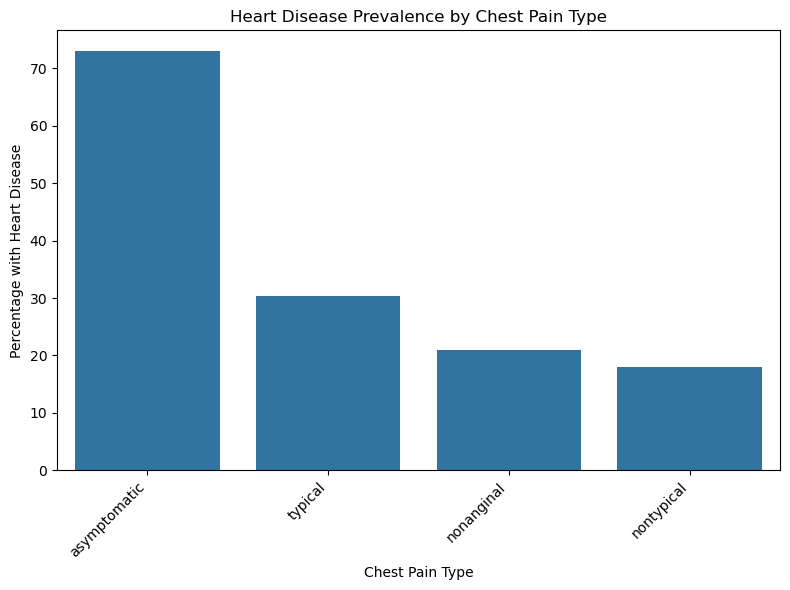

In [66]:
plt.figure(figsize=(8, 6))
sns.barplot(x=chest_pain_heart_disease.index, y=chest_pain_heart_disease.values)
plt.title('Heart Disease Prevalence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Percentage with Heart Disease')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insight 3

In [67]:
print("\nInsight 3: Higher cholesterol levels tend to be observed in individuals with heart disease.")
avg_cholesterol = df.groupby('AHD')['Chol'].mean()
print("Average Cholesterol Levels (mg/dl):\n", avg_cholesterol)


Insight 3: Higher cholesterol levels tend to be observed in individuals with heart disease.
Average Cholesterol Levels (mg/dl):
 AHD
No    -0.078404
Yes    0.092506
Name: Chol, dtype: float64


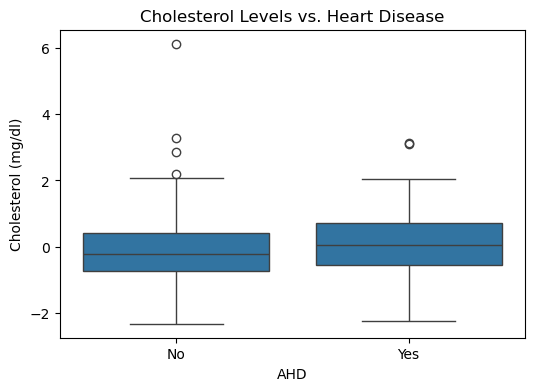

In [68]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='AHD', y='Chol', data=df)
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('AHD')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

### Insight 4

#Maximum Heart Rate Achieved and Heart Disease

In [69]:
print("\nInsight 4: Lower maximum heart rate achieved during exercise might be associated with heart disease.")
avg_maxhr = df.groupby('AHD')['MaxHR'].mean()
print("Average Maximum Heart Rate Achieved (bpm):\n", avg_maxhr)


Insight 4: Lower maximum heart rate achieved during exercise might be associated with heart disease.
Average Maximum Heart Rate Achieved (bpm):
 AHD
No     0.384057
Yes   -0.453132
Name: MaxHR, dtype: float64


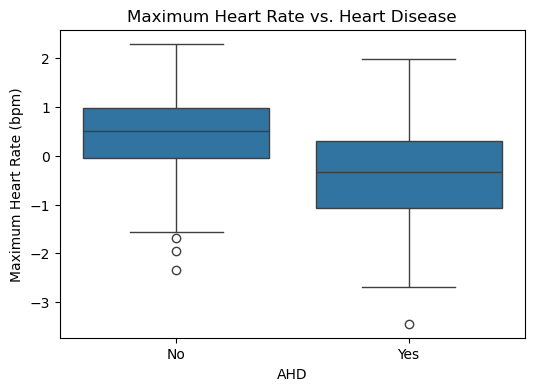

In [70]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='AHD', y='MaxHR', data=df)
plt.title('Maximum Heart Rate vs. Heart Disease')
plt.xlabel('AHD')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.show()